<a href="https://colab.research.google.com/github/saigupta2025/Deep-learning/blob/main/L1_and_L2_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 style='color:blue' align='center'>L1 and L2 Regularization</h2>

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Suppress Warnings for clean notebook
import warnings
warnings.filterwarnings('ignore')

**We are going to use Melbourne House Price Dataset where we'll predict House Predictions based on various features.**
#### The Dataset Link is
https://www.kaggle.com/anthonypino/melbourne-housing-market

In [ ]:
# read dataset
dataset = pd.read_csv('./Melbourne_housing_FULL.csv')

In [ ]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
dataset.nunique()

,0
Rooms,12
Propertycount,336
Distance,213
Bedroom2,14
Bathroom,10
...,...
CouncilArea_Whitehorse City Council,2
CouncilArea_Whittlesea City Council,2
CouncilArea_Wyndham City Council,2
CouncilArea_Yarra City Council,2


In [ ]:
# let's use limited columns which makes more sense for serving our purpose
cols_to_use = ['Suburb', 'Rooms', 'Type', 'Method', 'SellerG', 'Regionname', 'Propertycount',
               'Distance', 'CouncilArea', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'Price']
dataset = dataset[cols_to_use]

In [ ]:
dataset.head()

,Suburb,Rooms,Type,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price
0,Abbotsford,2,h,SS,Jellis,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,126.0,NaN,NaN
1,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,1.0,202.0,NaN,1480000.0
2,Abbotsford,2,h,S,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,2.0,1.0,0.0,156.0,79.0,1035000.0
3,Abbotsford,3,u,VB,Rounds,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,1.0,0.0,NaN,NaN
4,Abbotsford,3,h,SP,Biggin,Northern Metropolitan,4019.0,2.5,Yarra City Council,3.0,2.0,0.0,134.0,150.0,1465000.0


In [ ]:
dataset.shape

(34857, 15)

#### Checking for Nan values

In [ ]:
dataset.isna().sum()

,0
Suburb,0
Rooms,0
Type,0
Method,0
SellerG,0
Regionname,3
Propertycount,3
Distance,1
CouncilArea,3
Bedroom2,8217


#### Handling Missing values

In [ ]:
# Some feature's missing values can be treated as zero (another class for NA values or absence of that feature)
# like 0 for Propertycount, Bedroom2 will refer to other class of NA values
# like 0 for Car feature will mean that there's no car parking feature with house
cols_to_fill_zero = ['Propertycount', 'Distance', 'Bedroom2', 'Bathroom', 'Car']
dataset[cols_to_fill_zero] = dataset[cols_to_fill_zero].fillna(0)

# other continuous features can be imputed with mean for faster results since our focus is on Reducing overfitting
# using Lasso and Ridge Regression
dataset['Landsize'] = dataset['Landsize'].fillna(dataset.Landsize.mean())
dataset['BuildingArea'] = dataset['BuildingArea'].fillna(dataset.BuildingArea.mean())

**Drop NA values of Price, since it's our predictive variable we won't impute it**

In [ ]:
dataset.dropna(inplace=True)

In [ ]:
dataset.shape

(27244, 15)

#### Let's one hot encode the categorical features

In [ ]:
dataset = pd.get_dummies(dataset, drop_first=True)

In [ ]:
dataset.head()

,Rooms,Propertycount,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,Price,Suburb_Aberfeldie,...,CouncilArea_Moorabool Shire Council,CouncilArea_Moreland City Council,CouncilArea_Nillumbik Shire Council,CouncilArea_Port Phillip City Council,CouncilArea_Stonnington City Council,CouncilArea_Whitehorse City Council,CouncilArea_Whittlesea City Council,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council
1,2,4019.0,2.5,2.0,1.0,1.0,202.0,160.2564,1480000.0,False,...,False,False,False,False,False,False,False,False,True,False
2,2,4019.0,2.5,2.0,1.0,0.0,156.0,79.0000,1035000.0,False,...,False,False,False,False,False,False,False,False,True,False
4,3,4019.0,2.5,3.0,2.0,0.0,134.0,150.0000,1465000.0,False,...,False,False,False,False,False,False,False,False,True,False
5,3,4019.0,2.5,3.0,2.0,1.0,94.0,160.2564,850000.0,False,...,False,False,False,False,False,False,False,False,True,False
6,4,4019.0,2.5,3.0,1.0,2.0,120.0,142.0000,1600000.0,False,...,False,False,False,False,False,False,False,False,True,False


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27244 entries, 1 to 34856
Columns: 745 entries, Rooms to CouncilArea_Yarra Ranges Shire Council
dtypes: bool(736), float64(8), int64(1)
memory usage: 21.2 MB


#### Let's bifurcate our dataset into train and test dataset

In [ ]:
X = dataset.drop('Price', axis=1)
y = dataset['Price']

In [ ]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=2)   # 0.3 means 30% used as testing data

#### Let's train our Linear Regression Model on training dataset and check the accuracy on test set

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_X, train_y)

In [ ]:
reg.score(test_X, test_y)   # score on testing data set R^2 value

0.1385368316165222

In [ ]:
reg.score(train_X, train_y)  # score on training data set

0.6827792395792723

**Here training score is 68% but test score is 13.85% which is very low**

<h4 style='color:purple'>Normal Regression is clearly overfitting the data, let's try other models</h4>

#### Using Lasso (L1 Regularized) Regression Model

In [ ]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50, max_iter=100, tol=0.1)
lasso_reg.fit(train_X, train_y)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [ ]:
lasso_reg.score(test_X, test_y)

0.6636111369404489

In [ ]:
lasso_reg.score(train_X, train_y)

0.6766985624766824

#### Using Ridge (L2 Regularized) Regression Model

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg= Ridge(alpha=50, max_iter=100, tol=0.1)
ridge_reg.fit(train_X, train_y)

Ridge(alpha=50, max_iter=100, tol=0.1)

In [ ]:
ridge_reg.score(test_X, test_y)

0.6670848945194958

In [ ]:
ridge_reg.score(train_X, train_y)

0.6622376739684328

**We see that Lasso and Ridge Regularizations prove to be beneficial when our Simple Linear Regression Model overfits. These results may not be that contrast but significant in most cases.Also that L1 & L2 Regularizations are used in Neural Networks too**

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, regularizers, models

# Create dummy dataset
np.random.seed(42)
X = np.random.randn(200, 10)
y = np.random.randint(0, 2, size=(200, 1))  # binary classification

# Convert to TensorFlow tensors
X = tf.constant(X, dtype=tf.float32)
y = tf.constant(y, dtype=tf.float32)

# Function to build model
def build_model(reg=None):
    return models.Sequential([
        layers.Dense(8, activation='relu', kernel_regularizer=reg, input_shape=(10,)),
        layers.Dense(1, activation='sigmoid')
    ])

# Models: No reg, L1, L2
models_dict = {
    "No Regularization": build_model(None),
    "L1 Regularization": build_model(regularizers.l1(0.01)),
    "L2 Regularization": build_model(regularizers.l2(0.01))
}

# Train each model
for name, model in models_dict.items():
    print(f"\n===== Training: {name} =====")
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    model.fit(X, y, epochs=10, batch_size=16, verbose=0)

    # Show learned weights
    weights, biases = model.layers[0].get_weights()
    print(f"Weights:\n{weights}\n")



===== Training: No Regularization =====
Weights:
[[ 0.2644928  -0.21499862 -0.3104112  -0.2367009  -0.48464316  0.15493435
  -0.14771406 -0.03883874]
 [ 0.19094141  0.01364937  0.31884685  0.04966158 -0.5111777   0.10086896
   0.00379938  0.04338232]
 [-0.3991839  -0.23273326  0.06826472  0.09629123  0.1942618   0.3421381
   0.07390972  0.17119938]
 [-0.14740613  0.09408371 -0.54099995 -0.00572088  0.25308043  0.10966061
  -0.41072914  0.2633168 ]
 [ 0.1341904  -0.4313375  -0.164579    0.4258615   0.507339    0.08155788
  -0.47932577 -0.53723454]
 [ 0.54599047  0.57649666 -0.51477474 -0.12671117 -0.5366412  -0.01174376
  -0.17096822  0.39593384]
 [-0.11656475 -0.1634579   0.5397562  -0.34264046  0.49329475  0.23722473
  -0.11454105  0.51536995]
 [-0.4840992   0.18924285  0.49805957  0.06372592 -0.28337458  0.17714043
   0.37365338 -0.11197822]
 [-0.31647858 -0.38086897 -0.4413661  -0.10683077 -0.1644996   0.03131684
   0.37535238 -0.43038824]
 [ 0.11932598 -0.12792088 -0.23479345 -0.1

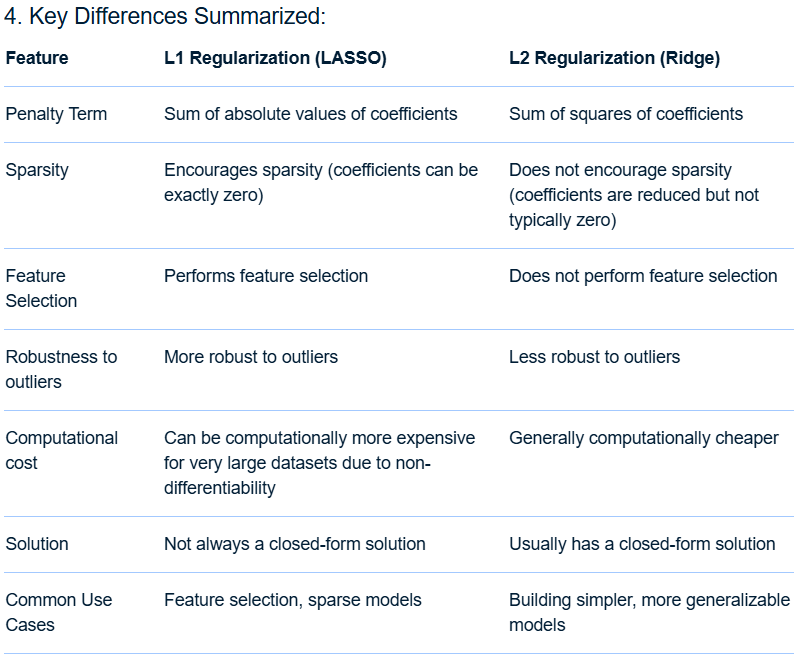